<a href="https://colab.research.google.com/github/Masato88/library-ex/blob/main/FactorAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=7073f801d2cf1848d406a92a865774c096102880ae811b9f8ddc6fa879a9d38b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


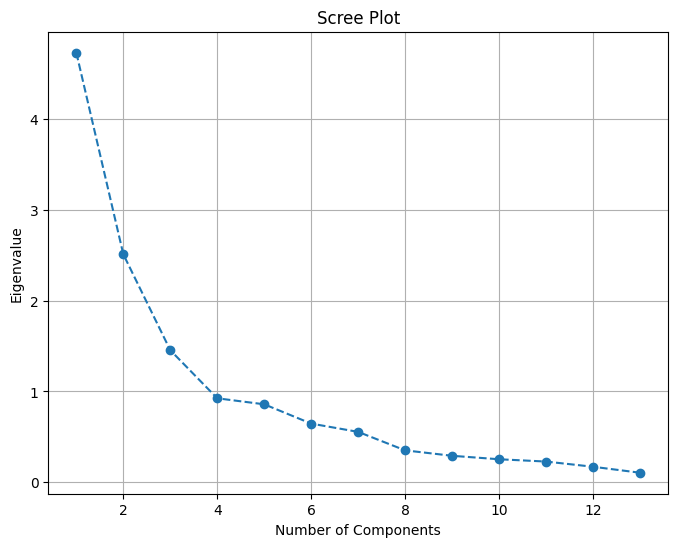

In [ ]:
# データの標準化（必要に応じて）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# 主成分分析の実施
pca = PCA()
pca.fit(data_scaled)

# 固有値の取得
eigenvalues = pca.explained_variance_

# スクリープロットの作成
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation="promax")
fa.fit(X)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa.loadings_ #因子負荷行列

array([[-0.08491906,  0.82823961, -0.12359457],
       [-0.49125569,  0.13442532,  0.16436814],
       [ 0.12219454,  0.22091625,  0.74362518],
       [-0.13258353, -0.37530385,  0.77140875],
       [ 0.14514348,  0.36952886,  0.1203264 ],
       [ 0.80149206,  0.23113688,  0.12015846],
       [ 0.93747016,  0.14087768,  0.12379531],
       [-0.47816448, -0.13605544,  0.19771946],
       [ 0.59668488,  0.14320391,  0.08461044],
       [-0.52687331,  0.77938156,  0.00713612],
       [ 0.71139733, -0.25661557, -0.04561823],
       [ 0.90423654, -0.12753124,  0.08513862],
       [ 0.27700376,  0.71222717, -0.10717406]])

In [ ]:
#wine

<Axes: xlabel='factor1', ylabel='factor2'>

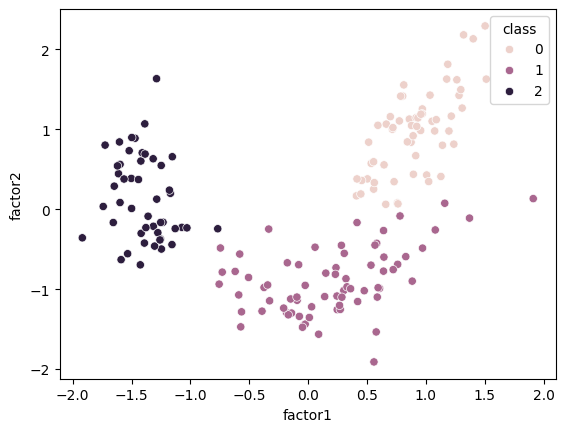

In [ ]:
result_df = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2', 'factor3']) #transformで因子スコアに変換
result_df['class'] = wine.target

sns.scatterplot(x='factor1', y='factor2', hue='class', data=result_df)

In [ ]:
result_df

,factor1,factor2,factor3,class
0,1.215782,1.165549,-0.459417,0
1,1.006739,0.428957,-1.807655,0
2,0.955680,0.985994,0.462944,0
3,1.320300,2.182732,0.112476,0
4,0.503946,0.380337,1.145330,0
...,...,...,...,...
173,-1.619533,0.542932,0.560387,2
174,-1.441339,0.372353,0.905336,2
175,-1.497801,0.897894,0.233069,2
176,-1.384902,0.691243,0.311573,2


In [ ]:
loadings_df = pd.DataFrame(fa.loadings_, columns=['factor1', 'factor2', 'factor3'])
loadings_df.index = wine.feature_names
loadings_df.loc['Total'] = loadings_df.sum()

loadings_df

,factor1,factor2,factor3
alcohol,-0.084919,0.828240,-0.123595
malic_acid,-0.491256,0.134425,0.164368
ash,0.122195,0.220916,0.743625
alcalinity_of_ash,-0.132584,-0.375304,0.771409
magnesium,0.145143,0.369529,0.120326
total_phenols,0.801492,0.231137,0.120158
flavanoids,0.937470,0.140878,0.123795
nonflavanoid_phenols,-0.478164,-0.136055,0.197719
proanthocyanins,0.596685,0.143204,0.084610
color_intensity,-0.526873,0.779382,0.007136


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svc = SVC(C=1.0)
y = wine.target

# 5分割交差検証
kf = KFold(n_splits=5, random_state=0, shuffle=True)

# 予測結果格納用NumPy配列
y_pred = np.zeros((len(X),), dtype=float)

for train_idx, valid_idx in kf.split(X):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]
    svc.fit(X_train, y_train)
    y_pred[valid_idx] = svc.predict(X_valid)